# Feature creation - Numerical features ( Feature Transformation )

4. box-cox transformation

Imagine you have a bunch of different sized balloons. Some are small, some are medium, and a few are really, really big. If you wanted to compare their sizes in a way that makes the differences between all of them clearer, especially if the really big balloons are making it hard to see the difference between the smaller ones, you might need a special way to measure them.

Box-Cox transformation is like having a magical tool that can automatically figure out the best way to "resize" your data (like the balloons) so that it looks more balanced and easier to work with. It's not just one specific way to resize, like always taking the square root or the logarithm. Instead, it tries out different "power" transformations to find the one that makes your data look most like a nice, symmetrical bell curve (which is often easier for computer models to understand).

Think of it as having a dial that you can turn. Turning it one way might be like taking the square root, turning it another way might be like taking the logarithm, and there are many other settings in between or even beyond. The Box-Cox process helps find the best setting on that dial for your specific data.

Here's a simplified example with something like income levels in a community:

Let's say you have the annual income (in thousands of Rupees) of several families:

200

300

450

600

900

1500

5000 (a much higher income)

If you plot these incomes, you might see a long tail towards the higher incomes.

Now, if we apply the Box-Cox transformation, it might figure out that using a logarithm-like transformation (but perhaps with a slightly different "power") is the best way to make this income data look more balanced. The transformed incomes might look something like this (these are just illustrative):

5.3

5.7

6.1

6.4

6.8

7.3

8.5

Notice how the very large jump from 1500 to 5000 in the original incomes is now a smaller jump from 7.3 to 8.5 in the transformed data. The transformation has helped to reduce the impact of the very high income.

Why is this useful?

1. Makes data more "normal": Many statistical and machine learning models work best when the data follows a normal distribution (the bell curve shape). Box-Cox can often transform skewed data to be closer to normal.
2. Stabilizes variance: Sometimes, the spread of your data might be different for low values compared to high values. Box-Cox can help make the spread more consistent across the range of the data.
3. Improves the performance of some models: When data is more normally distributed and has stable variance, models like linear regression can make more reliable predictions.

In simple terms, the Box-Cox transformation is like a smart data "reshaper." It automatically tries different mathematical adjustments to make your numerical data look more balanced and well-behaved, which can be really helpful for understanding the data and building accurate computer models. It's like having a tailor who can alter your clothes to fit you perfectly, rather than just offering one-size-fits-all adjustments.

# 1. Import necessary libraries

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 2. Create dataset

In [112]:
# 1. Real-life Example: Skewed Sales Data (in Thousands of Rupees)

# Imagine you have sales data for a small business. It might be right-skewed
# with many moderate sales and a few very high-value transactions.

sales_data = [
    15, 22, 18, 30, 25, 10, 5, 60, 45, 12,
    20, 28, 16, 35, 21, 8, 7, 120, 90, 15,
    25, 31, 19, 40, 27, 11, 9, 180, 75, 22,
    30, 26, 14, 42, 23, 13, 6, 240, 50, 18,
    # Imagine more moderate sales figures
]

# 3. Add skewed datapoints to the dataset

In [113]:
# Let's add some high-value sales to create stronger skewness
sales_data += [350, 500, 750, 1200]

In [114]:
# Create a Pandas Series
sales_data_original = pd.Series(sales_data + list(np.random.randint(10, 80, 90)) + list(np.random.randint(80, 300, 10)),name='Original Sales Data')

# 4. Visualize the Population Density

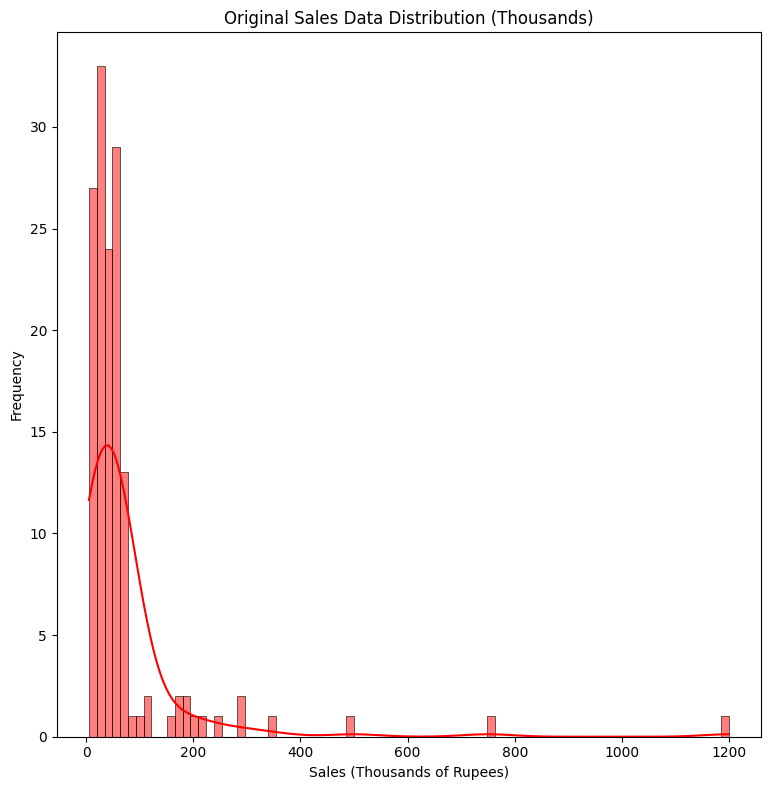

In [116]:
# Visualize the original distribution
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.histplot(sales_data_original, kde=True , color='Red')
plt.title('Original Sales Data Distribution (Thousands)')
plt.xlabel('Sales (Thousands of Rupees)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The sales data distribution is heavily skewed to the right, indicating a large number of low sales values and a few very high sales values.

# 5. Feature transformation using box-cox transformation

In [117]:
# Apply Box-Cox Transformation
# scipy.stats.boxcox returns the transformed data and the optimal lambda value
transformed_sales, optimal_lambda = stats.boxcox(sales_data_original)

In [119]:
boxcox_transformed_sales = pd.Series(transformed_sales, name='Box-Cox Transformed Sales')

# 6. Visualize the box-cox transformed feature

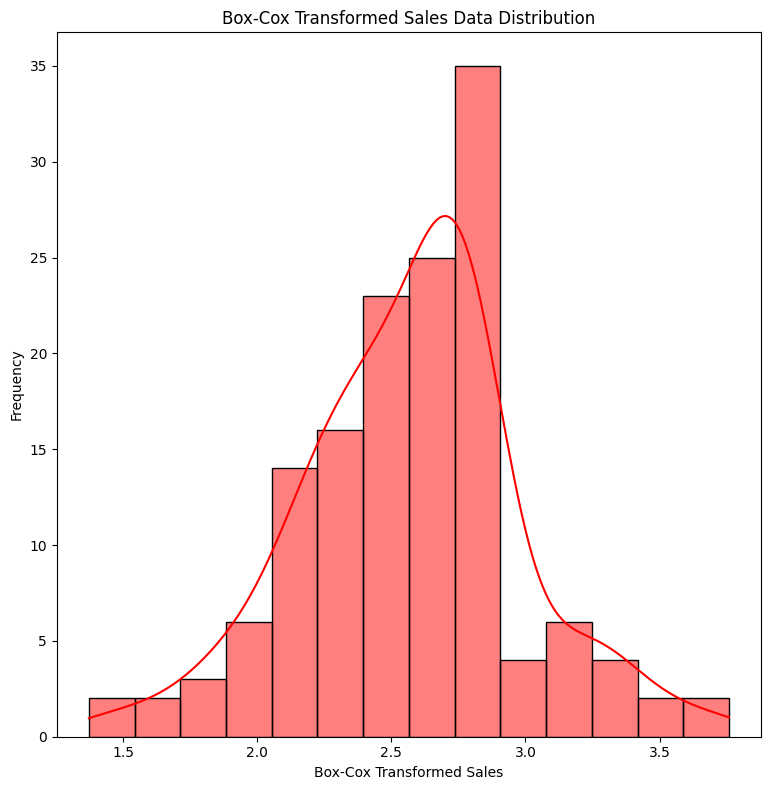

In [120]:
# Visualize the transformed distribution
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 2)
sns.histplot(boxcox_transformed_sales, kde=True , color='Red')
plt.title('Box-Cox Transformed Sales Data Distribution')
plt.xlabel('Box-Cox Transformed Sales')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Inference : The Box-Cox transformed sales data distribution appears more symmetrical and closer to a normal distribution compared to the original.

Mathematical Form:

If λ ≠ 0: y' = (y^λ - 1) / λ

If λ = 0: y' = ln(y)

When to Use:

1. When the Appropriate Transformation is Unknown: The Box-Cox transformation is a family of power transformations that includes log (when λ approaches 0) and can automatically suggest the optimal λ value to transform the data towards normality.
2. To Achieve Normality and Stabilize Variance: It aims to find a transformation that simultaneously addresses both skewness and heteroscedasticity.

How it Helps:

1. Optimizes Transformation for Normality: Statistically determines the best power transformation to make the data as close to a normal distribution as possible.
2. Comprehensive Approach: Considers a range of transformations, making it a flexible tool.

Important Considerations:

1. Positive Data Only: The standard Box-Cox formula requires positive data. Modifications exist for data with zeros or negative values.
2. Parameter Estimation: The optimal λ is usually estimated from the data, which adds a step to the analysis.

Interpretability: The resulting transformed variable might not have a straightforward intuitive interpretation depending on the estimated λ value.

# 7. Comparing the 2 columns

In [121]:
# Create DataFrame using pd.concat()
df_concat = pd.concat([sales_data_original, boxcox_transformed_sales], axis=1 )
df_concat

,Original Sales Data,Box-Cox Transformed Sales
0,15,2.083291
1,22,2.295957
2,18,2.186593
3,30,2.456465
4,25,2.363338
...,...,...
139,169,3.187483
140,94,2.967573
141,179,3.207658
142,151,3.147269


So while considering in a model we should consider the 'Box-Cox Transformed Sales' column